In [79]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import keras

In [80]:
dataset_size = 200

class_1 = np.random.uniform(low=0.2, high=0.4, size=(dataset_size,))
class_2 = np.random.uniform(low=0.7, high=0.5, size=(dataset_size,))

dataset = []
for i in range(0, dataset_size, 2):
    dataset.append([class_1[i],class_1[i+1],1])
    dataset.append([class_2[i],class_2[i+1],2])
    
df_train = pd.DataFrame(data=dataset, columns=['x','y','class'])
    
df_train.head()

,x,y,class
0,0.359409,0.274839,1
1,0.681253,0.606300,2
2,0.224682,0.314974,1
3,0.579419,0.695805,2
4,0.200217,0.375905,1


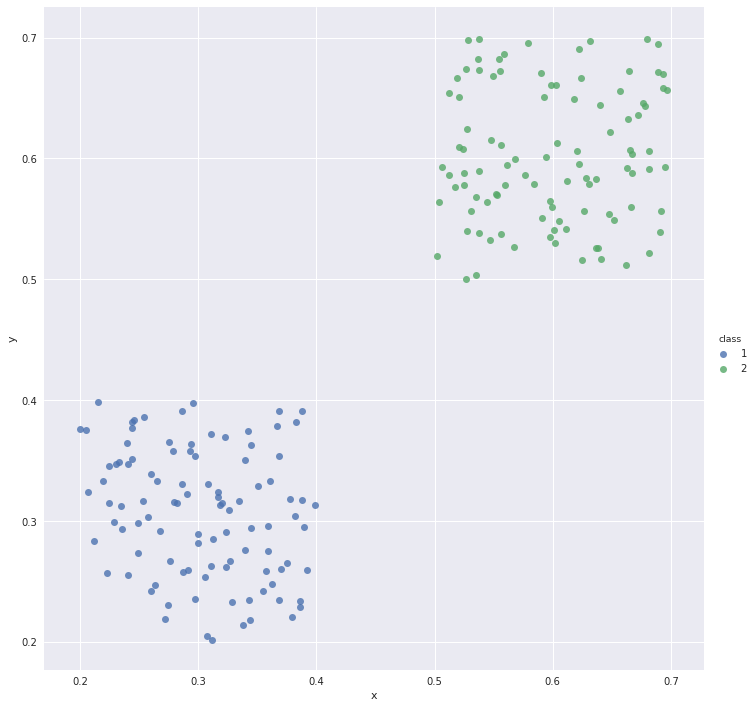

In [81]:
sns.set(style="darkgrid")

sns.lmplot(data=df_train, x='x', y='y',hue='class',fit_reg=False, size=10)

In [82]:
from sklearn.preprocessing import LabelEncoder

x_train = df_train.iloc[:,0:-1].values
y_train = df_train.iloc[:, -1]

nr_feats = x_train.shape[1]
nr_classes = y_train.nunique()

label_enc = LabelEncoder()
label_enc.fit(y_train)

y_train = keras.utils.to_categorical(label_enc.transform(y_train), nr_classes)

In [94]:
from keras.models import Sequential
from keras.layers import Dense


model = Sequential()
model.add(Dense(units=2, activation='sigmoid', input_shape= (nr_feats,)))
model.add(Dense(units=nr_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [95]:
model.fit(x_train, y_train, epochs=5, batch_size=32, verbose=True)
accuracy_score(model.predict_classes(x_train),  df_train.iloc[:, -1].values)

Epoch 1/5
200/200 [==============================] - 0s 1ms/step - loss: 0.8123 - acc: 0.5000
Epoch 2/5
200/200 [==============================] - 0s 63us/step - loss: 0.8059 - acc: 0.5000
Epoch 3/5
200/200 [==============================] - 0s 68us/step - loss: 0.8000 - acc: 0.5000
Epoch 4/5
200/200 [==============================] - 0s 70us/step - loss: 0.7940 - acc: 0.5000
Epoch 5/5
200/200 [==============================] - 0s 68us/step - loss: 0.7881 - acc: 0.5000


0.5

In [85]:
from sklearn.neural_network import MLPClassifier

sk_model = MLPClassifier(hidden_layer_sizes=(3,),activation='logistic')

sk_model.fit(x_train, df_train.iloc[:, -1].values)

/home/anton/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(3,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [86]:
from sklearn.metrics import accuracy_score

accuracy_score(sk_model.predict(x_train), df_train.iloc[:, -1].values)

0.5

In [87]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(x_train, df_train.iloc[:, -1].values)

accuracy_score(logreg.predict(x_train), df_train.iloc[:, -1].values)

1.0